In [1]:
from utils import plot_decision_boundary, poly_linear_regression, CM_BRIGHT

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Cargamos dataset delimitando por ';' para ver su perfil

In [2]:


pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

house_data = pd.read_csv("airbnb-listings-extract.csv", sep=";")

print("Dimensiones del dataset:", house_data.shape)
print("\nTipos de datos por columna:")
print(house_data.dtypes)

print("\nPrimeras filas del dataset:")
display(house_data.head(5))

print("\nPorcentaje de valores nulos por columna:")
nulls = (house_data.isnull().sum() / len(house_data) * 100).sort_values(ascending=False)
display(nulls.to_frame(name='% Nulos'))


Dimensiones del dataset: (14780, 89)

Tipos de datos por columna:
ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

Primeras filas del dataset:


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,"Loft in the Hill country 12-15 minutes directly west of downtown Austin. It has a private deck that has a spectacular view of the surrounding hills. Equipped with Queen Bed, Refrigerator, microwave, TV w/Cable, Microwave, Wifi, A/C,Coffee Maker, etc","This loft has a spectacular view of the hills in the West Austin Area. It is located 12 minutes from Austin City Limits Festival, 15 minutes from SXSW festival, and less then 20 minutes from Circuit of the Americas in East Austin. The loft is equipped with Wifi as well as Cable TV. The Bedroom has wooden floors and the bathroom is tiled. The loft has cedar base boards, cedar crown molding, and the windows are also framed with cedar for a very western feel. This is a perfect place for long term guests planning to be in town on business for a few months or more.","Loft in the Hill country 12-15 minutes directly west of downtown Austin. It has a private deck that has a spectacular view of the surrounding hills. Equipped with Queen Bed, Refrigerator, microwave, TV w/Cable, Microwave, Wifi, A/C,Coffee Maker, etc This loft has a spectacular view of the hills in the West Austin Area. It is located 12 minutes from Austin City Limits Festival, 15 minutes from SXSW festival, and less then 20 minutes from Circuit of the Americas in East Austin. The loft is equipped with Wifi as well as Cable TV. The Bedroom has wooden floors and the bathroom is tiled. The loft has cedar base boards, cedar crown molding, and the windows are also framed with cedar for a very western feel. This is a perfect place for long term guests planning to be in town on business for a few months or more. The loft is entirely private to the guest as is the Deck with the Hill Country view. My wife and I live on the property so we would be happy to do what we can to make your stay",none,This neighborhood is located in the hills west of downtown Austin with spectacular views both on the property as well as driving to it. The property is blocks away from Lake Austin.,"The loft is located on a gated property. There is a button on the gate to open from the outside. Upon arrival I will provide a gate remote to avoid getting out of your vehicle during your stay. Smoking is permitted on the outside Private Deck but not inside the loft. We have a ""Superior"" rated water supply so drinking from the sink is safe.","There is no public transportation from this location, but by car you're less then 15 minutes to downtown Austin and less than 20 minutes to Circuit of the Americas in East Austin.",The loft is entirely private to the guest as is the Deck with the Hill Country view.,My wife and I


Porcentaje de valores nulos por columna:


,% Nulos
Has Availability,99.918809
Host Acceptance Rate,99.736130
Jurisdiction Names,98.464141
License,97.638701
Square Feet,95.953992
...,...
Minimum Nights,0.000000
Extra People,0.000000
Guests Included,0.000000
Room Type,0.000000


Procedemos a eliminar columnas que no aportan nada para nuestro analisis:

In [3]:
col_to_del = [
    'Host Name',
    'ID',
    'Listing Url',
    'Scrape ID', 
    'Last Scraped',
    'Name',
    'Summary',
    'Space',
    'Description',
    'Neighborhood Overview',
    'Notes',
    'Transit',
    'Access',
    'Interaction',
    'House Rules',
    'Thumbnail Url',
    'Medium Url',
    'Picture Url',
    'XL Picture Url',
    'Host ID',
    'Host URL',
    'Host Since',
    'Host Thumbnail Url',
    'Host Picture Url',
    'Host Listings Count',
    'Host Verifications',
    'State',
    'Zipcode',
    'Market',
    'Smart Location',
    'Country Code',
    'Country',
    'Security Deposit',
    'Cleaning Fee',
    'Minimum Nights',
    'Maximum Nights',
    'Has Availability',
    'Availability 30',
    'Availability 60',
    'Availability 90',
    'Availability 365',
    'Review Scores Accuracy',
    'Review Scores Cleanliness',
    'Review Scores Checkin',
    'Review Scores Communication',
    'Review Scores Location',
    'Review Scores Value',
    'License',
    'Jurisdiction Names',
    'Calculated host listings count',
    'Reviews per Month',
    'Geolocation',
    'Features',
    'Host Location',
    'Host About',
    'First Review',
    'First Review',
    
]
house_data = house_data.drop(columns=col_to_del, errors='ignore')
print("dataset:", house_data.shape)


dataset: (14780, 33)


Hacemos division de train y test y los guardaos en 2 documentos  distintos.

In [4]:

train, test = train_test_split(house_data, test_size=0.2, shuffle=True, random_state=0)


train.to_csv('./data/airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/airbnb_test.csv', sep=';', decimal='.', index=False)


house_data = pd.read_csv('./data/airbnb_train.csv', sep=';', decimal='.')
house_data.head()


,Experiences Offered,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Neighbourhood,Host Total Listings Count,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Guests Included,Extra People,Calendar Updated,Calendar last Scraped,Number of Reviews,Last Review,Review Scores Rating,Cancellation Policy
0,none,within a few hours,100.0,NaN,Jerónimos,2.0,"Jerónimos, Madrid, Comunidad de Madrid 28014, Spain",Jerónimos,Jerónimos,Retiro,Madrid,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Hangers",NaN,60.0,550.0,1250.0,1,0,2 weeks ago,2017-04-08,12,2017-02-28,95.0,moderate
1,none,within an hour,100.0,NaN,NaN,1.0,"Madrid, Comunidad de Madrid 28012, Spain",NaN,Sol,Centro,Madrid,40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Family/kid friendly,Washer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace",NaN,50.0,NaN,NaN,1,0,today,2017-04-08,20,2017-03-20,91.0,flexible
2,none,within an hour,100.0,NaN,Carabanchel,16.0,"Carabanchel, Madrid, Comunidad de Madrid 28025, Spain",Carabanchel,Vista Alegre,Carabanchel,Madrid,40.389048,-3.740374,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,"Internet,Wireless Internet,Wheelchair accessible,Pool,Kitchen,Free parking on premises,Doorman,Breakfast,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Suitable for events,Washer,Smoke detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,Lock on bedroom door,Hangers,Hair dryer,Iron,Laptop friendly workspace",NaN,10.0,NaN,NaN,1,0,a week ago,2017-04-08,0,NaN,NaN,moderate
3,none,within a few hours,100.0,NaN,Justicia,114.0,"Madrid, Comunidad de Madrid 28012, Spain",NaN,Embajadores,Centro,Madrid,40.412814,-3.703052,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Heating,Washer",NaN,30.0,NaN,NaN,1,0,3 days ago,2017-04-08,0,NaN,NaN,strict
4,none,within an hour,100.0,NaN,Gaztambide,2.0,"Gaztambide, Madrid, 28 28015, Spain",Gaztambide,Gaztambide,Chamberí,Madrid,40.438631,-3.713716,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo",NaN,32.0,NaN,NaN,1,10,5 days ago,2017-04-08,97,2017-02-28,92.0,strict


In [5]:

house_data = pd.read_csv('./data/airbnb_train.csv', sep=';', decimal='.')
print("Dimensiones del dataset limpio de entrenamiento:", house_data.shape)


Dimensiones del dataset limpio de entrenamiento: (11824, 33)


Seleccionamos solo las columnas numéricas

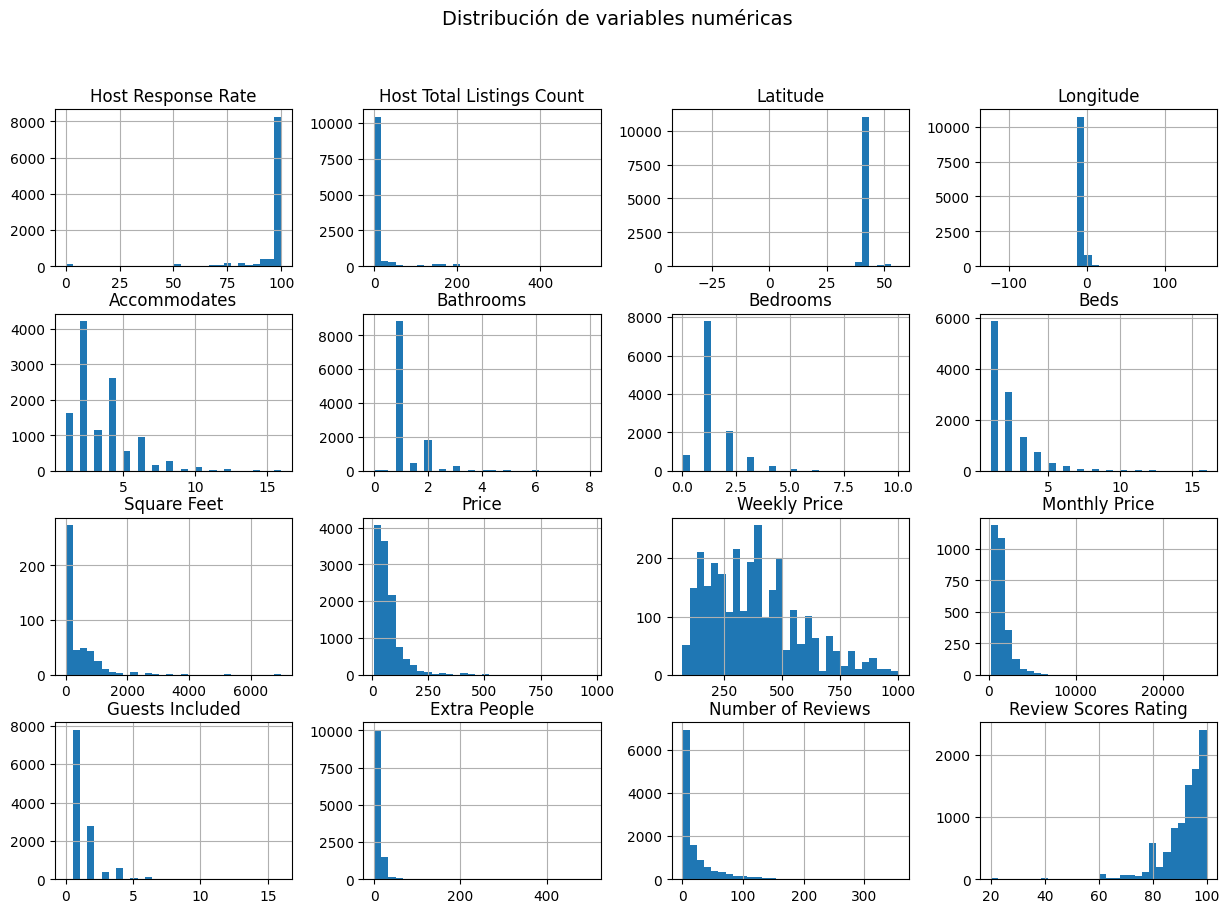

In [6]:

num_cols = house_data.select_dtypes(include=['int64', 'float64']).columns

house_data[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribución de variables numéricas", fontsize=14)
plt.show()


Ordenamos por desviación estandard  y vems correlaciones con precio,

In [7]:
print("\nCDesviación standard:")

print(house_data[num_cols].std().sort_values())

corr = house_data.corr(numeric_only=True)
print("\nCorrelaciones con Price:")
print(corr['Price'].sort_values(ascending=False))



CDesviación standard:
Bathrooms                       0.664691
Bedrooms                        0.905180
Guests Included                 1.160518
Beds                            1.623489
Accommodates                    2.093973
Latitude                        4.701030
Review Scores Rating            9.137614
Extra People                   12.373491
Longitude                      14.014695
Host Response Rate             15.247078
Host Total Listings Count      34.578895
Number of Reviews              38.092338
Price                          71.624844
Weekly Price                  194.751472
Square Feet                   671.125823
Monthly Price                1236.992934
dtype: float64

Correlaciones con Price:
Price                        1.000000
Weekly Price                 0.880469
Monthly Price                0.827679
Accommodates                 0.528380
Bedrooms                     0.492316
Square Feet                  0.450778
Beds                         0.438198
Bathrooms     

Eliminamos más columnas que son reduntates

In [8]:
cols_to_drop_more = [
    'Host Response Rate',     
    'Review Scores Rating',    
    'Weekly Price',           
    'Monthly Price',          
    'Extra People'            
]
house_data = house_data.drop(columns=cols_to_drop_more, errors='ignore')


print("dataset:", house_data.shape)


dataset: (11824, 28)


Transformamos nuestras variables 

In [9]:
cols_to_log = ['Price', 'Square Feet', 'Host Total Listings Count']

for col in cols_to_log:
    if col in house_data.columns:
        house_data[f'log_{col}'] = np.log1p(house_data[col]) 


house_data['amenities_count'] = (
    house_data['Amenities']
      .fillna('')                   
      .astype(str)                  
      .str.replace('"', '', regex=False)  
      .str.strip('{}[] ')           
      .str.split(',')               
      .apply(lambda xs: sum(1 for x in xs if x.strip())) 
)

In [10]:

print(house_data.columns.tolist())

house_data.describe()


['Experiences Offered', 'Host Response Time', 'Host Acceptance Rate', 'Host Neighbourhood', 'Host Total Listings Count', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Guests Included', 'Calendar Updated', 'Calendar last Scraped', 'Number of Reviews', 'Last Review', 'Cancellation Policy', 'log_Price', 'log_Square Feet', 'log_Host Total Listings Count', 'amenities_count']


,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Guests Included,Number of Reviews,log_Price,log_Square Feet,log_Host Total Listings Count,amenities_count
count,11821.000000,11824.000000,11824.000000,11824.000000,11780.000000,11804.00000,11787.000000,474.000000,11809.000000,11824.000000,11824.000000,11809.000000,474.000000,11821.000000,11824.000000
mean,12.754420,40.491628,-3.776863,3.277486,1.285229,1.34429,2.049122,396.489451,73.712592,1.581614,22.664834,4.046497,3.495653,1.526720,14.254482
std,34.578895,4.701030,14.014695,2.093973,0.664691,0.90518,1.623489,671.125823,71.624844,1.160518,38.092338,0.695720,3.080159,1.154426,4.877951
min,0.000000,-37.851182,-123.124429,1.000000,0.000000,0.00000,1.000000,0.000000,9.000000,0.000000,0.000000,2.302585,0.000000,0.000000,0.000000
25%,1.000000,40.409758,-3.707538,2.000000,1.000000,1.00000,1.000000,0.000000,34.000000,1.000000,1.000000,3.555348,0.000000,0.693147,11.000000
50%,2.000000,40.419331,-3.700763,3.000000,1.000000,1.00000,2.000000,90.000000,55.000000,1.000000,7.000000,4.025352,4.510860,1.098612,14.000000
75%,6.000000,40.430778,-3.683917,4.000000,1.000000,2.00000,2.000000,624.000000,87.000000,2.000000,27.000000,4.477337,6.437752,1.945910,17.000000
max,519.000000,55.966912,153.371427,16.000000,8.000000,10.00000,16.000000,6997.000000,969.000000,16.000000,356.000000,6.877296,8.853380,6.253829,39.000000


Seleccionamos nuestra variable objetivo y nuestras variables predictoras

In [11]:

y = house_data['log_Price']
features = [
    'Accommodates',
    'Bathrooms',
    'Bedrooms',
    'Beds',
    'Guests Included',
    'Square Feet',
    'log_Square Feet',
    'amenities_count',
    'log_Host Total Listings Count'
    
]
X = house_data[features]

print(features)




['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Guests Included', 'Square Feet', 'log_Square Feet', 'amenities_count', 'log_Host Total Listings Count']


Imputamos valores nulo o eliminamos directamente segun  los resultados y comprobamos

In [12]:


nulls = house_data.isnull().sum().sort_values(ascending=False)
nulls_percent = (house_data.isnull().mean() * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({'Nulos': nulls,'% Nulos': nulls_percent})

print("Valores nulos por columna ")
display(missing_df[missing_df['Nulos'] > 0])


Valores nulos por columna 


,Nulos,% Nulos
Host Acceptance Rate,11794,99.746279
Square Feet,11350,95.991204
log_Square Feet,11350,95.991204
Neighbourhood,4159,35.174222
Host Neighbourhood,3082,26.065629
Last Review,2540,21.481732
Host Response Time,1507,12.745264
Neighbourhood Group Cleansed,818,6.918133
Amenities,141,1.192490
Bathrooms,44,0.372124


In [13]:
cols_high_null = ['Host Acceptance Rate', 'Square Feet', 'log_Square Feet','Host Total Listings Count']
house_data = house_data.drop(columns=cols_high_null, errors='ignore')


house_data['Neighbourhood'] = house_data['Neighbourhood'].fillna('Unknown')

house_data = house_data.drop(columns=['Host Neighbourhood'], errors='ignore')

house_data['Last Review'] = house_data['Last Review'].fillna(house_data['Last Review'].mode()[0])
house_data['Host Response Time'] = house_data['Host Response Time'].fillna('unknown')
house_data['Neighbourhood Group Cleansed'] = house_data['Neighbourhood Group Cleansed'].fillna(house_data['Neighbourhood Group Cleansed'].mode()[0])
house_data['Amenities'] = house_data['Amenities'].fillna('None')
house_data['City'] = house_data['City'].fillna(house_data['City'].mode()[0])

for col in ['Bathrooms', 'Beds', 'Bedrooms', 'Price', 'log_Price', 'Host Total Listings Count', 'log_Host Total Listings Count']:
    if col in house_data.columns:
        house_data[col] = house_data[col].fillna(house_data[col].median())

print("Valores nulos por columna ")
print(house_data.isnull().sum().sort_values(ascending=False).head(10))


Valores nulos por columna 
Experiences Offered              0
Beds                             0
log_Host Total Listings Count    0
log_Price                        0
Cancellation Policy              0
Last Review                      0
Number of Reviews                0
Calendar last Scraped            0
Calendar Updated                 0
Guests Included                  0
dtype: int64


Imputamos ahora las variables categoricas

In [14]:
cat_cols = house_data.select_dtypes(include=['object']).columns.tolist()

print("Variables categóricas :")
print(cat_cols)

for col in cat_cols:
    print(f"\n{col} ({house_data[col].nunique()} valores únicos):")
    print(house_data[col].unique()[:10])  
cols_to_drop_cat = ['Street', 'Calendar Updated', 'Calendar last Scraped', 'Last Review','Latitude','Longitude']
house_data = house_data.drop(columns=cols_to_drop_cat, errors='ignore')

print("\nColumnas actuales en el dataset:")
print(house_data.columns.tolist())




Variables categóricas :
['Experiences Offered', 'Host Response Time', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Calendar Updated', 'Calendar last Scraped', 'Last Review', 'Cancellation Policy']

Experiences Offered (5 valores únicos):
['none' 'family' 'romantic' 'social' 'business']

Host Response Time (5 valores únicos):
['within a few hours' 'within an hour' 'within a day' 'unknown'
 'a few days or more']

Street (1438 valores únicos):
['Jerónimos, Madrid, Comunidad de Madrid 28014, Spain'
 'Madrid, Comunidad de Madrid 28012, Spain'
 'Carabanchel, Madrid, Comunidad de Madrid 28025, Spain'
 'Gaztambide, Madrid, 28 28015, Spain'
 'Embajadores, Madrid, Comunidad de Madrid 28012, Spain'
 'Madrid, Comunidad de Madrid 28005, Spain'
 'Sol, Madrid, Comunidad de Madrid 28013, Spain'
 'Illetes, Illes Balears 07181, Spain'
 'Goya, Madrid, Comunidad de Madrid 28006, Spain'
 'Fuente del Berr

In [15]:
num_cols = house_data.select_dtypes(include=['int64', 'float64']).columns
print(f"Columnas numéricas ({len(num_cols)}):")
print(num_cols.tolist())


Columnas numéricas (10):
['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Guests Included', 'Number of Reviews', 'log_Price', 'log_Host Total Listings Count', 'amenities_count']


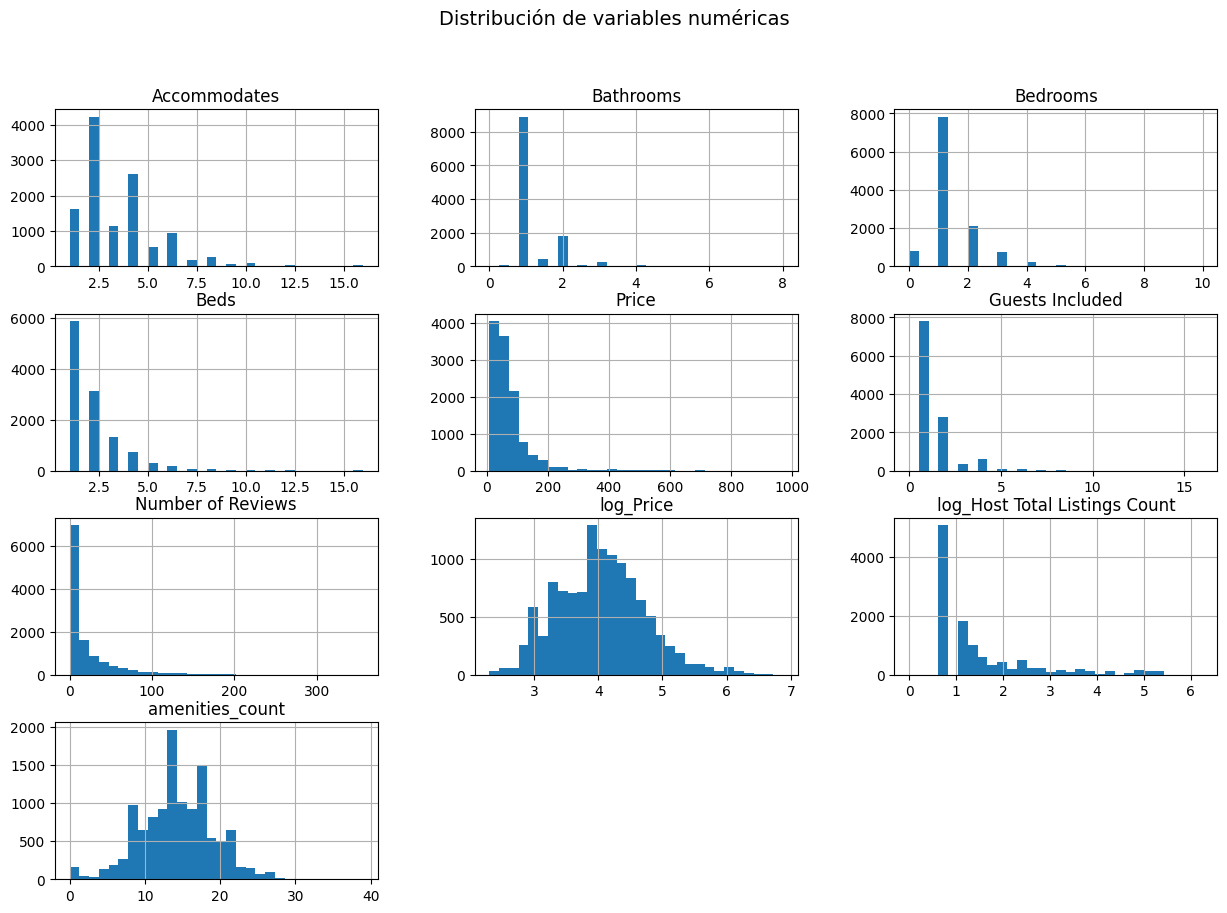

In [16]:

house_data[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribución de variables numéricas ", fontsize=14)
plt.show()


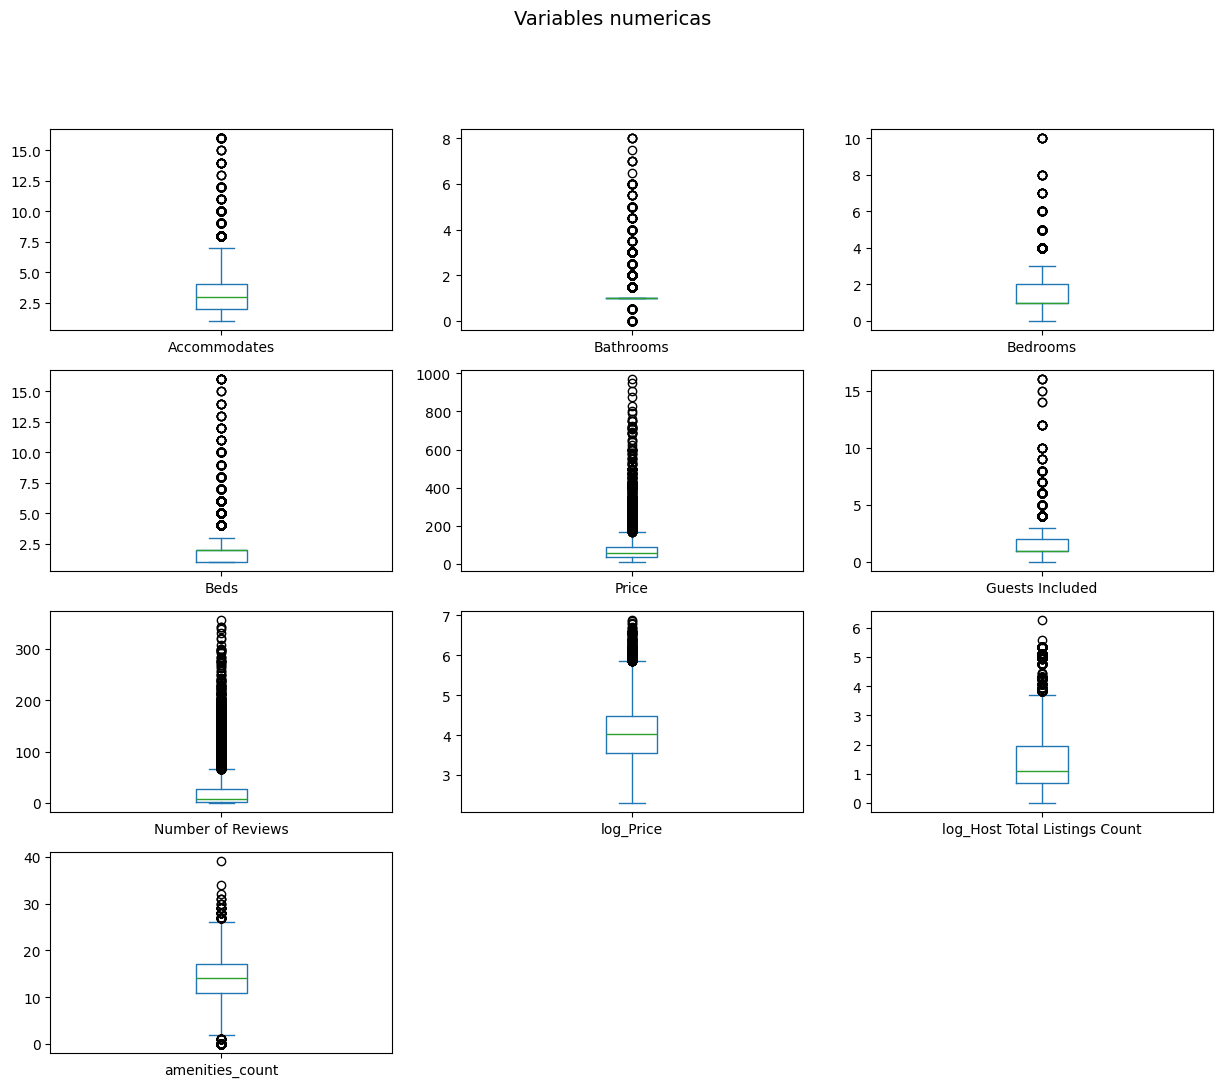

In [17]:
house_data[num_cols].plot(
    kind='box', 
    subplots=True, 
    layout=(int(np.ceil(len(num_cols)/3)), 3), 
    figsize=(15, 12), 
    sharex=False, 
    sharey=False
)
plt.suptitle("Variables numericas", fontsize=14)
plt.show()


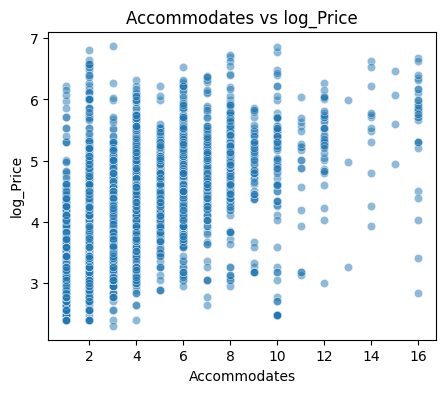

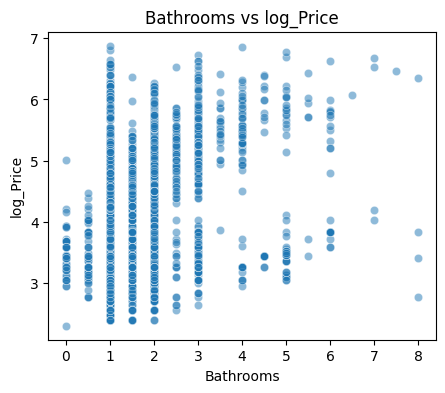

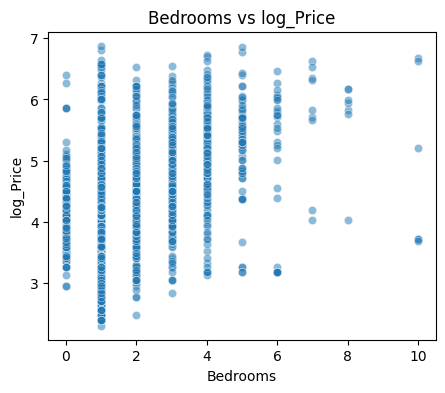

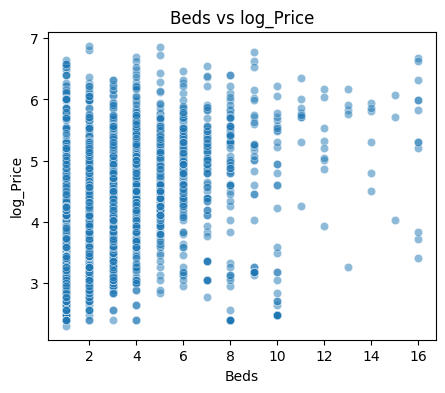

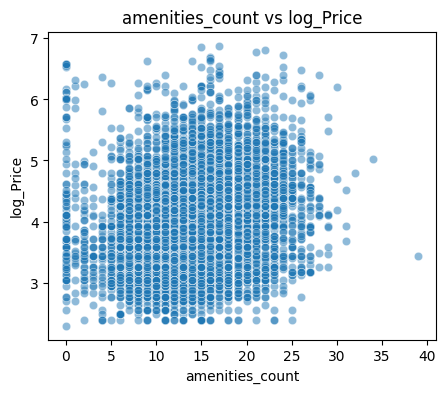

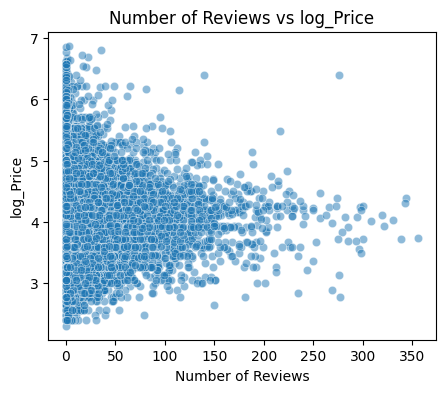

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

vars_to_plot = ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'amenities_count', 'Number of Reviews']

for col in vars_to_plot:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=house_data[col], y=house_data['log_Price'], alpha=0.5)
    plt.title(f'{col} vs log_Price')
    plt.show()


Iputamos ahora variables categóricas

In [19]:
cat_cols = house_data.select_dtypes(include=['object']).columns

missing_cat = house_data[cat_cols].isnull().sum()
missing_cat = missing_cat[missing_cat > 0].sort_values(ascending=False)

print("Nulos en variables categóricas:")
display(missing_cat)


Nulos en variables categóricas:


Series([], dtype: int64)

In [20]:
cat_cols = house_data.select_dtypes(include=['object']).columns.tolist()

print(f"Columnas categóricas ({len(cat_cols)}):")
print(cat_cols)


Columnas categóricas (11):
['Experiences Offered', 'Host Response Time', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Cancellation Policy']


In [21]:
print(house_data['Host Response Time'].unique())

response_order = {
    'within an hour': 4,
    'within a few hours': 3,
    'within a day': 2,
    'a few days or more': 1,
    'unknown': 0
}

house_data['Host Response Time'] = house_data['Host Response Time'].map(response_order)

print(house_data['Host Response Time'].head())


['within a few hours' 'within an hour' 'within a day' 'unknown'
 'a few days or more']
0    3
1    4
2    4
3    3
4    4
Name: Host Response Time, dtype: int64


In [22]:
print(house_data['Room Type'].value_counts().head(15))
house_data = pd.get_dummies(house_data, columns=['Room Type'], drop_first=True)
print(house_data[[c for c in house_data.columns if 'Room Type' in c]])


Room Type
Entire home/apt    7191
Private room       4471
Shared room         162
Name: count, dtype: int64
       Room Type_Private room  Room Type_Shared room
0                       False                  False
1                       False                  False
2                       False                   True
3                        True                  False
4                        True                  False
...                       ...                    ...
11819                   False                  False
11820                   False                  False
11821                   False                  False
11822                   False                  False
11823                    True                  False

[11824 rows x 2 columns]


In [23]:
print(house_data['Property Type'].value_counts().head(15))
house_data = pd.get_dummies(house_data, columns=['Property Type'], drop_first=True)
cols_property = [c for c in house_data.columns if 'Property Type' in c]
print(cols_property)

Property Type
Apartment             9598
House                 1085
Condominium            284
Bed & Breakfast        274
Loft                   248
Other                  171
Dorm                    37
Guesthouse              32
Chalet                  22
Townhouse               15
Villa                   15
Hostel                  13
Serviced apartment       9
Boutique hotel           5
Camper/RV                3
Name: count, dtype: int64
['Property Type_Bed & Breakfast', 'Property Type_Boat', 'Property Type_Boutique hotel', 'Property Type_Bungalow', 'Property Type_Camper/RV', 'Property Type_Casa particular', 'Property Type_Chalet', 'Property Type_Condominium', 'Property Type_Dorm', 'Property Type_Earth House', 'Property Type_Guest suite', 'Property Type_Guesthouse', 'Property Type_Hostel', 'Property Type_House', 'Property Type_Loft', 'Property Type_Other', 'Property Type_Serviced apartment', 'Property Type_Tent', 'Property Type_Townhouse', 'Property Type_Villa']


In [24]:

print(house_data['Bed Type'].value_counts())
house_data = pd.get_dummies(house_data, columns=['Bed Type'], drop_first=True)
cols_bed = [c for c in house_data.columns if 'Bed Type' in c]
print(f"Columnas creadas ({len(cols_bed)}):")
print(cols_bed)
house_data[cols_bed].head()


Bed Type
Real Bed         11565
Pull-out Sofa      201
Futon               36
Couch               17
Airbed               5
Name: count, dtype: int64
Columnas creadas (4):
['Bed Type_Couch', 'Bed Type_Futon', 'Bed Type_Pull-out Sofa', 'Bed Type_Real Bed']


,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True


In [25]:
print(house_data['Cancellation Policy'].value_counts())
house_data = pd.get_dummies(house_data, columns=['Cancellation Policy'], drop_first=True)
cols_cancel = [c for c in house_data.columns if 'Cancellation Policy' in c]

print(cols_cancel)


Cancellation Policy
strict             4590
flexible           3756
moderate           3376
strict_new           30
super_strict_60      24
moderate_new         18
super_strict_30      17
flexible_new         13
Name: count, dtype: int64
['Cancellation Policy_flexible_new', 'Cancellation Policy_moderate', 'Cancellation Policy_moderate_new', 'Cancellation Policy_strict', 'Cancellation Policy_strict_new', 'Cancellation Policy_super_strict_30', 'Cancellation Policy_super_strict_60']


In [26]:
print(house_data['Experiences Offered'].value_counts(dropna=False))
house_data = house_data.drop(columns=['Experiences Offered'], errors='ignore')
print("Valores únicos de City:", house_data['City'].nunique())
print(house_data['City'].value_counts())


Experiences Offered
none        11810
business        6
family          3
social          3
romantic        2
Name: count, dtype: int64
Valores únicos de City: 222
City
Madrid              10571
Barcelona             235
London                104
Paris                  85
Palma                  44
                    ...  
Berlín                  1
Mile End / Bow          1
Dorroughby              1
Templeogue              1
Aravaca (Madrid)        1
Name: count, Length: 222, dtype: int64


In [27]:
house_data['City'] = house_data['City'].astype(str).str.strip().str.lower()

house_data = house_data[house_data['City'] == 'madrid'].copy()
print("Dimensiones del nuevo dataset:", house_data.shape)
house_data = house_data.drop(columns=['City'], errors='ignore')


Dimensiones del nuevo dataset: (10579, 49)


In [28]:
house_data = pd.get_dummies(house_data, columns=['Neighbourhood Group Cleansed'], drop_first=True)
cols_ngroup = [c for c in house_data.columns if 'Neighbourhood Group Cleansed_' in c]

top_neigh = house_data['Neighbourhood Cleansed'].value_counts().nlargest(20).index
house_data['Neighbourhood Cleansed'] = house_data['Neighbourhood Cleansed'].apply(
    lambda x: x if x in top_neigh else 'Other'
)
house_data = pd.get_dummies(house_data, columns=['Neighbourhood Cleansed'], drop_first=True)
cols_neigh = [c for c in house_data.columns if 'Neighbourhood Cleansed_' in c]
print(f"Columnas creadas ({len(cols_neigh)}):")
print(cols_neigh)



Columnas creadas (20):
['Neighbourhood Cleansed_Almagro', 'Neighbourhood Cleansed_Arapiles', 'Neighbourhood Cleansed_Argüelles', 'Neighbourhood Cleansed_Cortes', 'Neighbourhood Cleansed_Cuatro Caminos', 'Neighbourhood Cleansed_Embajadores', 'Neighbourhood Cleansed_Gaztambide', 'Neighbourhood Cleansed_Goya', 'Neighbourhood Cleansed_Guindalera', 'Neighbourhood Cleansed_Justicia', 'Neighbourhood Cleansed_Lista', 'Neighbourhood Cleansed_Other', 'Neighbourhood Cleansed_Pacífico', 'Neighbourhood Cleansed_Palacio', 'Neighbourhood Cleansed_Palos de Moguer', 'Neighbourhood Cleansed_Puerta del Angel', 'Neighbourhood Cleansed_Recoletos', 'Neighbourhood Cleansed_Sol', 'Neighbourhood Cleansed_Trafalgar', 'Neighbourhood Cleansed_Universidad']


Dimensiones tras limpieza e imputaciones nuestro dataset

In [29]:
print(house_data['Neighbourhood'].value_counts().head(20))


Neighbourhood
Unknown               3534
Malasaña               693
La Latina              649
Embajadores            638
Sol                    592
Cortes                 458
Justicia               439
Palacio                321
Aluche                 182
Argüelles              178
Trafalgar              164
Carabanchel            157
Ciudad Lineal          146
Palos do Moguer        142
Goya                   130
Guindalera             104
Puente de Vallecas      99
Recoletos               95
Arapiles                93
Pacifico                83
Name: count, dtype: int64


In [30]:
house_data['neigh_match'] = (house_data['Neighbourhood'].str.lower() != 'unknown').astype(int)
print(house_data['neigh_match'].value_counts(normalize=True))

neigh_match
1    0.665942
0    0.334058
Name: proportion, dtype: float64


In [31]:
price_by_match = house_data.groupby('neigh_match')['log_Price'].mean()
print(price_by_match)


neigh_match
0    3.873255
1    4.034253
Name: log_Price, dtype: float64


In [32]:
print("Dimensiones finales del dataset:", house_data.shape)
print("\nTipos de datos:")
print(house_data.dtypes.value_counts())


Dimensiones finales del dataset: (10579, 87)

Tipos de datos:
bool       73
int64       6
float64     6
object      2
Name: count, dtype: int64


In [33]:
house_data.select_dtypes(include=['object']).columns


Index(['Neighbourhood', 'Amenities'], dtype='object')

In [34]:
object_cols = house_data.select_dtypes(include=['object']).columns
print(f"Columnas object ({len(object_cols)}):")
for col in object_cols:
    print("-", col)


Columnas object (2):
- Neighbourhood
- Amenities


In [35]:
col = 'Neighbourhood'
print(house_data[col].value_counts(dropna=False).head(10))
top_neigh = house_data['Neighbourhood'].value_counts().nlargest(20).index
house_data['Neighbourhood_grouped'] = house_data['Neighbourhood'].apply(
    lambda x: x if x in top_neigh else 'Other'
)

print(house_data['Neighbourhood_grouped'].value_counts().head(10))


Neighbourhood
Unknown        3534
Malasaña        693
La Latina       649
Embajadores     638
Sol             592
Cortes          458
Justicia        439
Palacio         321
Aluche          182
Argüelles       178
Name: count, dtype: int64
Neighbourhood_grouped
Unknown        3534
Other          1682
Malasaña        693
La Latina       649
Embajadores     638
Sol             592
Cortes          458
Justicia        439
Palacio         321
Aluche          182
Name: count, dtype: int64


In [36]:
object_cols = house_data.select_dtypes(include=['object']).columns
print(f"Columnas tipo object ({len(object_cols)}):")
for col in object_cols:
    print("-", col)


Columnas tipo object (3):
- Neighbourhood
- Amenities
- Neighbourhood_grouped


In [37]:
house_data = pd.get_dummies(house_data, columns=['Neighbourhood_grouped'], drop_first=True)
print(house_data.dtypes.value_counts())
house_data = house_data.drop(columns=['Neighbourhood'], errors='ignore')


bool       93
int64       6
float64     6
object      2
Name: count, dtype: int64


In [38]:
object_cols = house_data.select_dtypes(include=['object']).columns
print(f"Columnas tipo object ({len(object_cols)}):")
for col in object_cols:
    print("-", col)


Columnas tipo object (1):
- Amenities


In [39]:

house_data = house_data.drop(columns=['Amenities'], errors='ignore')



Empezamos con el modelo

In [40]:
y = house_data['log_Price']
X = house_data.drop(columns=['log_Price', 'Price'], errors='ignore')

print(f"Shape X: {X.shape}, y: {y.shape}")


Shape X: (10579, 103), y: (10579,)


In [41]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")


Train shape: (8463, 103)
Test shape: (2116, 103)


In [42]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Ridge Train RMSE: 0.3729, R²: 0.6772
Ridge Test  RMSE: 0.3617, R²: 0.6849


,Importancia
Room Type_Private room,0.316475
Accommodates,0.146797
Bedrooms,0.119887
Room Type_Shared room,0.117925
Neighbourhood Group Cleansed_Salamanca,0.082734
Neighbourhood Group Cleansed_Chamberí,0.065134
Neighbourhood Group Cleansed_Centro,0.056997
Neighbourhood Cleansed_Sol,0.049971
Neighbourhood Group Cleansed_Retiro,0.047220
amenities_count,0.046237


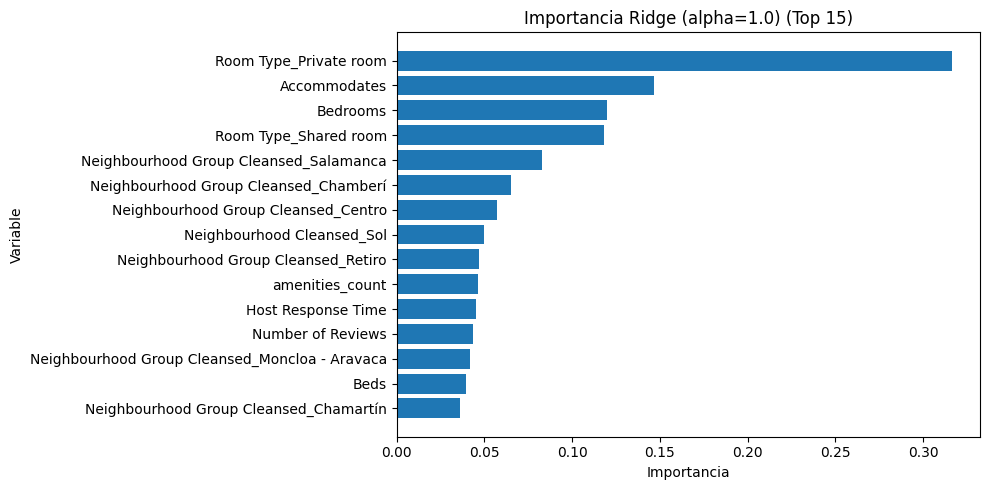

In [43]:



ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)

y_train_pred_ridge = ridge.predict(X_train_scaled)
y_test_pred_ridge  = ridge.predict(X_test_scaled)

rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
rmse_test_ridge  = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
r2_train_ridge   = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge    = r2_score(y_test, y_test_pred_ridge)

print(f"Ridge Train RMSE: {rmse_train_ridge:.4f}, R²: {r2_train_ridge:.4f}")
print(f"Ridge Test  RMSE: {rmse_test_ridge:.4f}, R²: {r2_test_ridge:.4f}")
imp = pd.Series(np.abs(ridge.coef_), index=X.columns).sort_values(ascending=False).head(15)
display(imp.to_frame('Importancia'))

plt.figure(figsize=(10,5))
plt.barh(imp.index[::-1], imp.values[::-1])
plt.title(f'Importancia Ridge (alpha={ridge.alpha}) (Top 15)')
plt.xlabel('Importancia'); plt.ylabel('Variable')
plt.tight_layout(); plt.show()


RidgeCV Train RMSE: 0.3730, R²: 0.6771
RidgeCV Test  RMSE: 0.3621, R²: 0.6842


,Importancia
Room Type_Private room,0.311944
Accommodates,0.143615
Bedrooms,0.118018
Room Type_Shared room,0.116499
Neighbourhood Group Cleansed_Salamanca,0.073423
Neighbourhood Group Cleansed_Chamberí,0.055979
Neighbourhood Group Cleansed_Centro,0.053905
Neighbourhood Cleansed_Sol,0.047476
amenities_count,0.046284
Host Response Time,0.044214


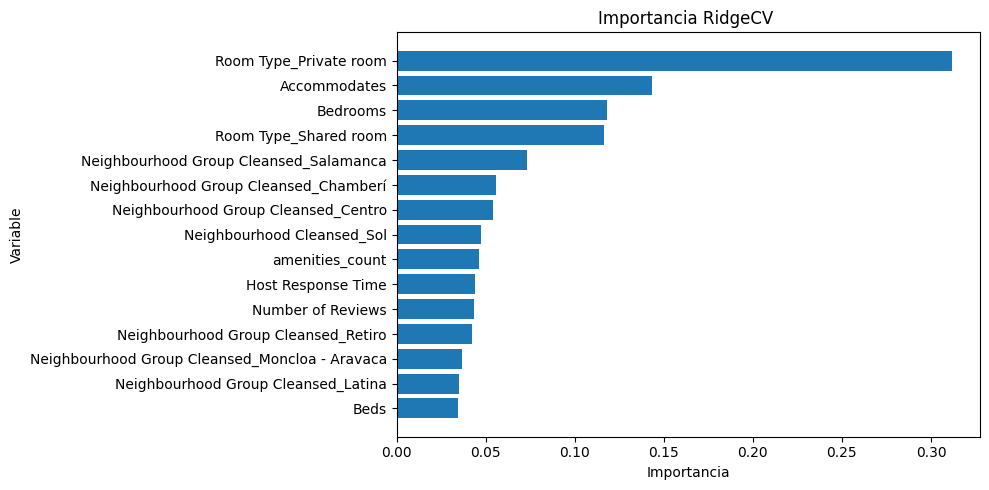

In [44]:

alphas_ridge = np.logspace(-4, 3, 50) 
ridge_cv = RidgeCV(alphas=alphas_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)
best_alpha_ridge = ridge_cv.alpha_

y_train_pred_ridge_cv = ridge_cv.predict(X_train_scaled)
y_test_pred_ridge_cv  = ridge_cv.predict(X_test_scaled)

rmse_train_ridge_cv = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge_cv))
rmse_test_ridge_cv  = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge_cv))
r2_train_ridge_cv   = r2_score(y_train, y_train_pred_ridge_cv)
r2_test_ridge_cv    = r2_score(y_test, y_test_pred_ridge_cv)

print(f"RidgeCV Train RMSE: {rmse_train_ridge_cv:.4f}, R²: {r2_train_ridge_cv:.4f}")
print(f"RidgeCV Test  RMSE: {rmse_test_ridge_cv:.4f}, R²: {r2_test_ridge_cv:.4f}")
imp = pd.Series(np.abs(ridge_cv.coef_), index=X.columns).sort_values(ascending=False).head(15)
display(imp.to_frame('Importancia'))

plt.figure(figsize=(10,5))
plt.barh(imp.index[::-1], imp.values[::-1])
plt.title('Importancia RidgeCV ')
plt.xlabel('Importancia'); plt.ylabel('Variable')
plt.tight_layout(); plt.show()

Lasso Train RMSE: 0.3732, R²: 0.6767
Lasso Test  RMSE: 0.3618, R²: 0.6848


,Importancia
Room Type_Private room,0.316331
Accommodates,0.142588
Bedrooms,0.118153
Room Type_Shared room,0.117755
Neighbourhood Group Cleansed_Centro,0.078262
Neighbourhood Group Cleansed_Salamanca,0.069475
Neighbourhood Group Cleansed_Chamberí,0.047885
amenities_count,0.045429
Host Response Time,0.043761
Number of Reviews,0.043012


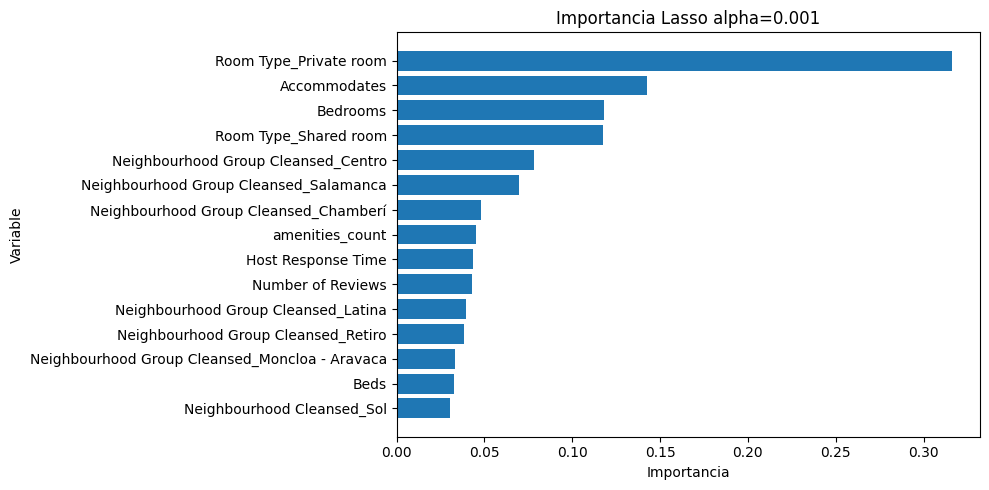

In [45]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lasso = Lasso(alpha=0.001, max_iter=10000, random_state=42)
lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso  = lasso.predict(X_test_scaled)

rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_test_lasso  = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
r2_train_lasso   = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso    = r2_score(y_test, y_test_pred_lasso)

print(f"Lasso Train RMSE: {rmse_train_lasso:.4f}, R²: {r2_train_lasso:.4f}")
print(f"Lasso Test  RMSE: {rmse_test_lasso:.4f}, R²: {r2_test_lasso:.4f}")

imp = pd.Series(np.abs(lasso.coef_), index=X.columns).sort_values(ascending=False).head(15)
display(imp.to_frame('Importancia'))

plt.figure(figsize=(10,5))
plt.barh(imp.index[::-1], imp.values[::-1])
plt.title(f'Importancia Lasso alpha={lasso.alpha}')
plt.xlabel('Importancia'); plt.ylabel('Variable')
plt.tight_layout(); plt.show()


LassoCV alpha óptimo: 0.001081
LassoCV Train RMSE: 0.3732, R²: 0.6766
LassoCV Test  RMSE: 0.3618, R²: 0.6847


,Importancia
Room Type_Private room,0.316308
Accommodates,0.142252
Bedrooms,0.118002
Room Type_Shared room,0.117733
Neighbourhood Group Cleansed_Centro,0.077975
Neighbourhood Group Cleansed_Salamanca,0.068662
Neighbourhood Group Cleansed_Chamberí,0.046987
amenities_count,0.045358
Host Response Time,0.043655
Number of Reviews,0.042939


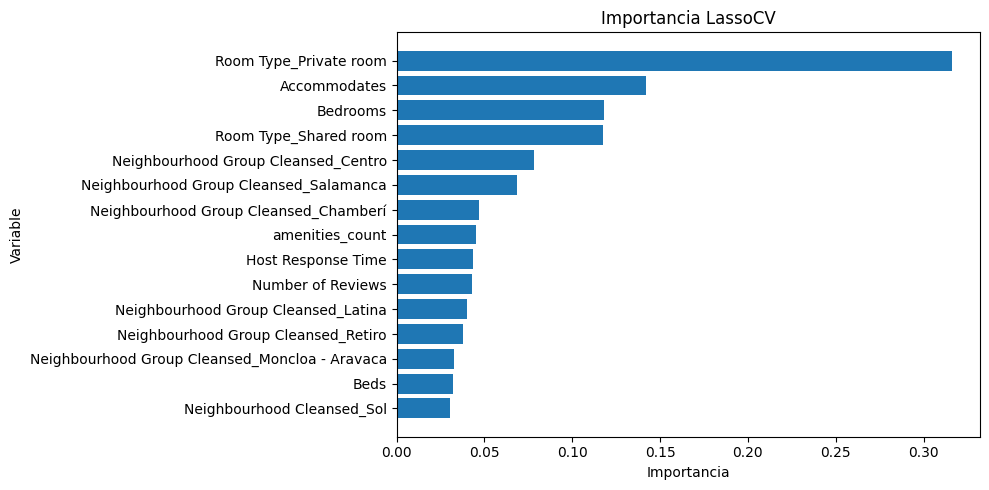

In [46]:


alphas_lasso = np.logspace(-5, 1, 60)  # 1e-5 ... 10
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)
best_alpha_lasso = lasso_cv.alpha_

y_train_pred_lasso_cv = lasso_cv.predict(X_train_scaled)
y_test_pred_lasso_cv  = lasso_cv.predict(X_test_scaled)

rmse_train_lasso_cv = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso_cv))
rmse_test_lasso_cv  = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso_cv))
r2_train_lasso_cv   = r2_score(y_train, y_train_pred_lasso_cv)
r2_test_lasso_cv    = r2_score(y_test, y_test_pred_lasso_cv)

print(f"LassoCV alpha óptimo: {best_alpha_lasso:.6f}")
print(f"LassoCV Train RMSE: {rmse_train_lasso_cv:.4f}, R²: {r2_train_lasso_cv:.4f}")
print(f"LassoCV Test  RMSE: {rmse_test_lasso_cv:.4f}, R²: {r2_test_lasso_cv:.4f}")

imp = pd.Series(np.abs(lasso_cv.coef_), index=X.columns).sort_values(ascending=False).head(15)
display(imp.to_frame('Importancia'))

plt.figure(figsize=(10,5))
plt.barh(imp.index[::-1], imp.values[::-1])
plt.title('Importancia LassoCV')
plt.xlabel('Importancia'); plt.ylabel('Variable')
plt.tight_layout(); plt.show()


Train LR RMSE: 0.3729,  R²: 0.6772
Test LR RMSE: 0.3617,  R²: 0.6849


,Importancia
Room Type_Private room,0.316520
Accommodates,0.146832
Bedrooms,0.119906
Room Type_Shared room,0.117939
Neighbourhood Group Cleansed_Salamanca,0.082855
Neighbourhood Group Cleansed_Chamberí,0.065254
Neighbourhood Group Cleansed_Centro,0.057012
Neighbourhood Cleansed_Sol,0.049992
Neighbourhood Group Cleansed_Retiro,0.047284
amenities_count,0.046237


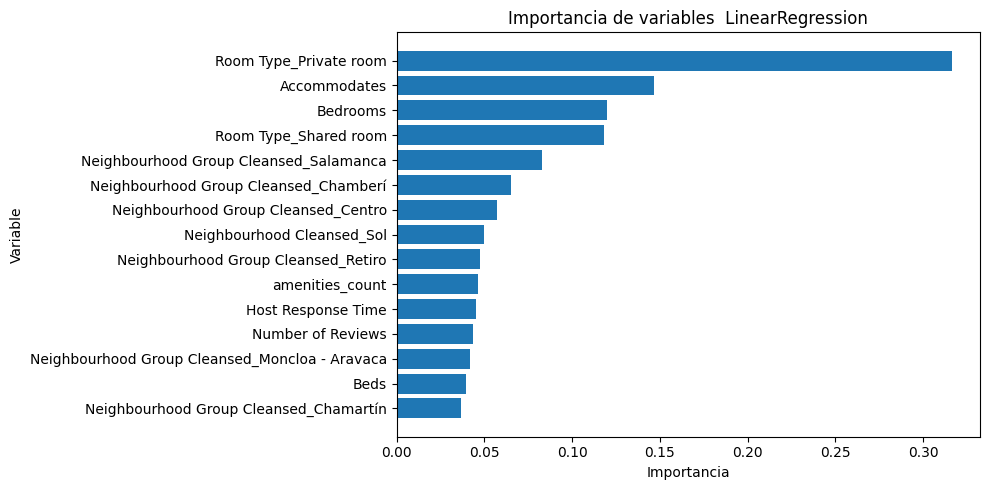

In [47]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train_scaled, y_train)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_train_pred = linreg.predict(X_train_scaled)
y_test_pred  = linreg.predict(X_test_scaled)


rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test  = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train   = r2_score(y_train, y_train_pred)
r2_test    = r2_score(y_test, y_test_pred)

print(f"Train LR RMSE: {rmse_train:.4f},  R²: {r2_train:.4f}")
print(f"Test LR RMSE: {rmse_test:.4f},  R²: {r2_test:.4f}")
imp = pd.Series(np.abs(linreg.coef_), index=X.columns).sort_values(ascending=False).head(15)
display(imp.to_frame('Importancia'))

plt.figure(figsize=(10,5))
plt.barh(imp.index[::-1], imp.values[::-1])
plt.title('Importancia de variables  LinearRegression')
plt.xlabel('Importancia'); plt.ylabel('Variable')
plt.tight_layout(); plt.show()

RF base Train RMSE: 0.1284, R²: 0.9617
RF base Test  RMSE: 0.3216, R²: 0.7510


,Importancia
Room Type_Private room,0.436726
Bathrooms,0.110810
amenities_count,0.053795
Room Type_Shared room,0.047454
Number of Reviews,0.046155
Accommodates,0.045878
log_Host Total Listings Count,0.040322
Host Response Time,0.021589
Bedrooms,0.017221
Beds,0.013919


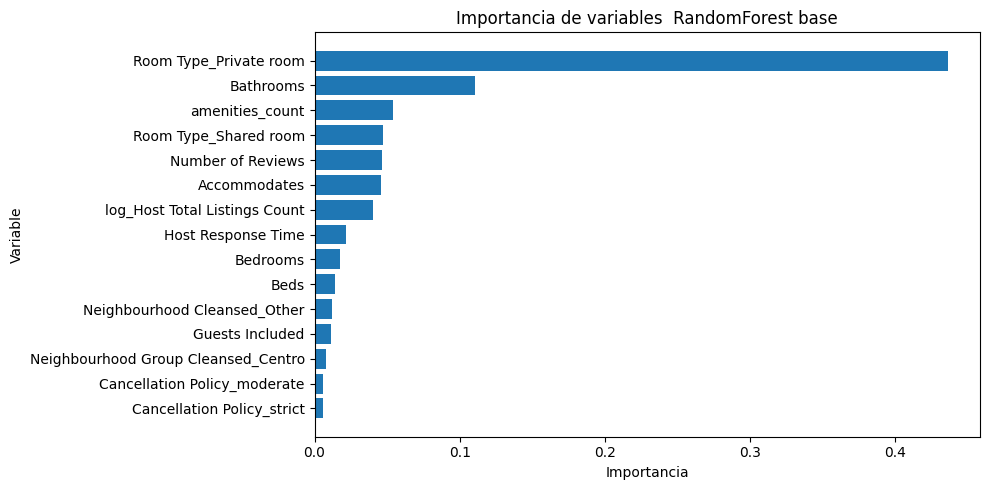

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf_base = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_base.fit(X_train_scaled, y_train)

y_train_pred_rf_base = rf_base.predict(X_train_scaled)
y_test_pred_rf_base  = rf_base.predict(X_test_scaled)

rmse_train_rf_base = np.sqrt(mean_squared_error(y_train, y_train_pred_rf_base))
rmse_test_rf_base  = np.sqrt(mean_squared_error(y_test,  y_test_pred_rf_base))
r2_train_rf_base   = r2_score(y_train, y_train_pred_rf_base)
r2_test_rf_base    = r2_score(y_test,  y_test_pred_rf_base)

print(f"RF base Train RMSE: {rmse_train_rf_base:.4f}, R²: {r2_train_rf_base:.4f}")
print(f"RF base Test  RMSE: {rmse_test_rf_base:.4f}, R²: {r2_test_rf_base:.4f}")

imp = pd.Series(rf_base.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
display(imp.to_frame('Importancia'))

plt.figure(figsize=(10,5))
plt.barh(imp.index[::-1], imp.values[::-1])
plt.title('Importancia de variables  RandomForest base')
plt.xlabel('Importancia'); plt.ylabel('Variable')
plt.tight_layout(); plt.show()


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Mejor configuración encontrada:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}
Mejor R² validación cruzada: 0.7221
Train RMSE: 0.1277,  R²: 0.9622
Test  RMSE: 0.3101,  R²: 0.7684


,Importancia
Room Type_Private room,0.178354
Accommodates,0.147198
Bedrooms,0.097898
Beds,0.070090
amenities_count,0.064691
log_Host Total Listings Count,0.048409
Bathrooms,0.047721
Number of Reviews,0.046214
Guests Included,0.042914
Host Response Time,0.026406


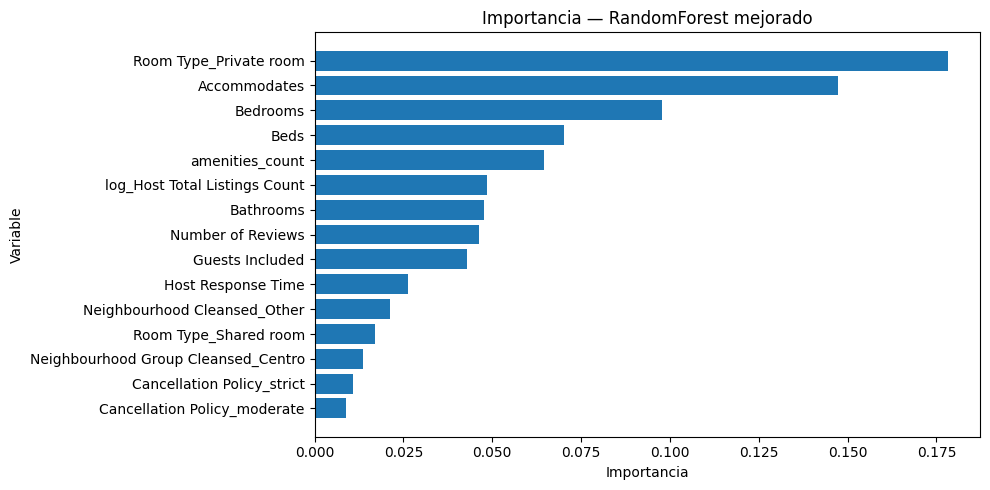

In [49]:


param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_tunning = RandomForestRegressor(random_state=42, n_jobs=-1)

rf_search_tunning = RandomizedSearchCV(
    rf_tunning,
    param_distributions=param_dist,
    n_iter=25,
    cv=3,
    scoring='r2',         
    verbose=1,
    random_state=42,
    refit=True             
)


rf_search_tunning.fit(X_train_scaled, y_train)

print("Mejor configuración encontrada:")
print(rf_search_tunning.best_params_)
print(f"Mejor R² validación cruzada: {rf_search_tunning.best_score_:.4f}")


best_rf = rf_search_tunning.best_estimator_
rf_mejorado = best_rf  


y_train_pred_best = best_rf.predict(X_train_scaled)
y_test_pred_best  = best_rf.predict(X_test_scaled)

rmse_train_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
rmse_test_best  = np.sqrt(mean_squared_error(y_test,  y_test_pred_best))
r2_train_best   = r2_score(y_train, y_train_pred_best)
r2_test_best    = r2_score(y_test,  y_test_pred_best)

print(f"Train RMSE: {rmse_train_best:.4f},  R²: {r2_train_best:.4f}")
print(f"Test  RMSE: {rmse_test_best:.4f},  R²: {r2_test_best:.4f}")


imp = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
display(imp.to_frame('Importancia'))

plt.figure(figsize=(10,5))
plt.barh(imp.index[::-1], imp.values[::-1])
plt.title('Importancia — RandomForest mejorado')
plt.xlabel('Importancia'); plt.ylabel('Variable')
plt.tight_layout(); plt.show()


RF refinado: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.3, 'max_depth': 12, 'bootstrap': True}
Train RMSE: 0.283757, R²: 0.813080
Test  RMSE: 0.315840, R²: 0.759764


,Importancia
Room Type_Private room,0.299669
Accommodates,0.180696
Bedrooms,0.121747
Bathrooms,0.060870
Beds,0.052097
Guests Included,0.039008
amenities_count,0.034572
Room Type_Shared room,0.031141
log_Host Total Listings Count,0.030286
Number of Reviews,0.026953


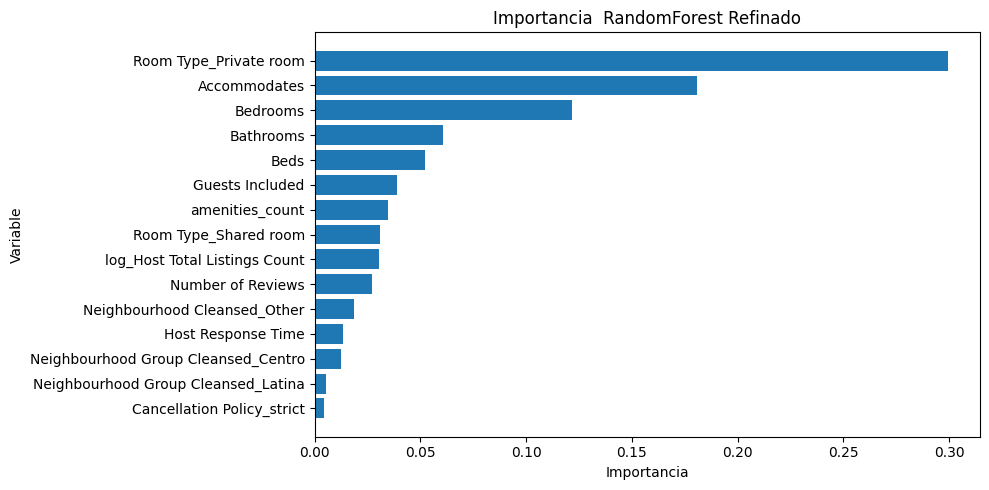

In [50]:


rf_refinado = RandomForestRegressor(random_state=42, n_jobs=-1)

param_dist = {
    "n_estimators": [200, 300, 400],
    "max_depth": [6, 8, 10, 12],
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [2, 4, 8, 12],
    "max_features": ["sqrt", 0.3, 0.5, 0.7],
    "bootstrap": [True]
}

rf_search2 = RandomizedSearchCV(
    rf_refinado, param_distributions=param_dist,
    n_iter=25, cv=5, random_state=42,
    scoring="neg_mean_squared_error", n_jobs=-1
)
rf_search2.fit(X_train_scaled, y_train)

best_rf2 = rf_search2.best_estimator_
rf_refinado = best_rf2
ytr = best_rf2.predict(X_train_scaled)
yts = best_rf2.predict(X_test_scaled)

rmse_tr = np.sqrt(mean_squared_error(y_train, ytr))
rmse_ts = np.sqrt(mean_squared_error(y_test,  yts))
print("RF refinado:", rf_search2.best_params_)
print(f"Train RMSE: {rmse_tr:.6f}, R²: {r2_score(y_train,ytr):.6f}")
print(f"Test  RMSE: {rmse_ts:.6f}, R²: {r2_score(y_test,yts):.6f}")
imp = pd.Series(best_rf2.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
display(imp.to_frame('Importancia'))

plt.figure(figsize=(10,5))
plt.barh(imp.index[::-1], imp.values[::-1])
plt.title('Importancia  RandomForest Refinado')
plt.xlabel('Importancia'); plt.ylabel('Variable')
plt.tight_layout(); plt.show()

-Random Forest mejorado obtuvo el mejor rendimiento en test (RMSE=0.3101, R²=0.7684). \n
-El Random forest refinado reduce el sobreajuste pero empeora levemente el error (RMSE=0.315840).\n

-LassoCV alcanza R²≈0.64, seleccionando  variables con sentido (capacidad, baños/dormitorios, ubicación, amenities).\n
-Recomendamos Random Forest mejorado como modelo final por su superior capacidad predictiva, complementado con LassoCV para la explicación de los factores clave del precio.